<a href="https://colab.research.google.com/github/huangw195/voicecall/blob/main/Voice_Call_Quality_Customer_Experience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reading the data:

In [1]:
import warnings

In [2]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving datafile.xls to datafile.xls


In [7]:
import pandas as pd
from scipy.io import arff
import numpy as np
df=pd.read_excel('datafile.xls')
print(df.dtypes)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
Operator               object
In Out Travelling      object
Network Type           object
Rating                  int64
Call Drop Category     object
Latitude              float64
Longitude             float64
State Name             object
dtype: object


In [8]:
df.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,Airtel,Indoor,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN
1,Airtel,Outdoor,4G,1,Call Dropped,-1.000000,-1.000000,NaN
2,Airtel,Travelling,4G,1,Call Dropped,-1.000000,-1.000000,NaN
3,RJio,Indoor,4G,5,Satisfactory,19.871658,75.542397,Maharashtra
4,BSNL,Indoor,3G,1,Call Dropped,16.437764,80.997508,Andhra Pradesh


In [9]:
df.shape

(9734, 8)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6077 entries, 3 to 9733
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Operator            6077 non-null   object
 1   In Out Travelling   6077 non-null   object
 2   Network Type        6077 non-null   object
 3   Rating              6077 non-null   int64 
 4   Call Drop Category  6077 non-null   object
dtypes: int64(1), object(4)
memory usage: 444.9+ KB


In [12]:
df.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,Rating,Latitude,Longitude
count,9734.000000,9734.000000,9734.000000
mean,3.316930,12.799645,48.590680
std,1.622471,11.542002,38.668232
min,1.000000,-1.000000,-1.000000
10%,1.000000,-1.000000,-1.000000
25%,1.000000,-1.000000,-1.000000
50%,4.000000,17.294859,73.887526
75%,5.000000,21.942517,77.977725
90%,5.000000,28.535673,85.158144
99%,5.000000,30.879145,88.403243


Data Cleaning:

In [98]:
df.isnull().sum()

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
dtype: int64

In [99]:
# Remove 3 cloumns
df=df.drop(['Latitude','Longitude','State Name'],axis=1)

KeyError: ignored

In [101]:
# rechecking to make sure no more NAs in the dataframe
df.isnull().sum()

Operator              0
In Out Travelling     0
Network Type          0
Rating                0
Call Drop Category    0
dtype: int64

In [102]:
df['Call Drop Category'].value_counts()

Satisfactory          4219
Poor Voice Quality    1347
Call Dropped           511
Name: Call Drop Category, dtype: int64

In [103]:
df['Operator'].value_counts()

RJio        2290
Airtel      2259
Vodafone     728
Idea         475
BSNL         325
Name: Operator, dtype: int64

In [104]:
df['In Out Travelling'].value_counts()

Indoor        3998
Outdoor       1544
Travelling     535
Name: In Out Travelling, dtype: int64

In [105]:
df['Network Type'].value_counts()

4G         4767
Unknown     711
3G          450
2G          149
Name: Network Type, dtype: int64

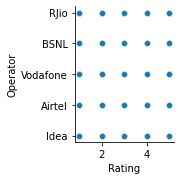

In [107]:
sns.pairplot(y_vars='Operator',x_vars='Rating',data=df)

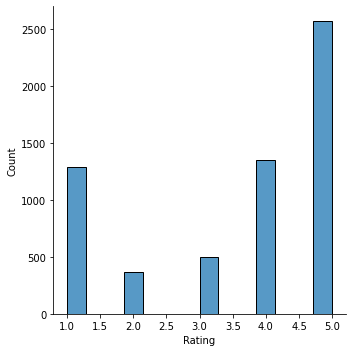

In [108]:
# distribution of rating
sns.displot(df['Rating'])
plt.show()

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns.



**Data Visulaization:**

In [109]:
df_numeric=df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,Rating
3,5
4,1
5,1
9,5
11,1


<Figure size 2160x2160 with 0 Axes>

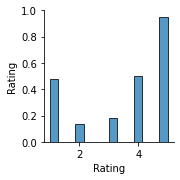

In [110]:
plt.figure(figsize=(30,30))
sns.pairplot(df_numeric)
plt.show()

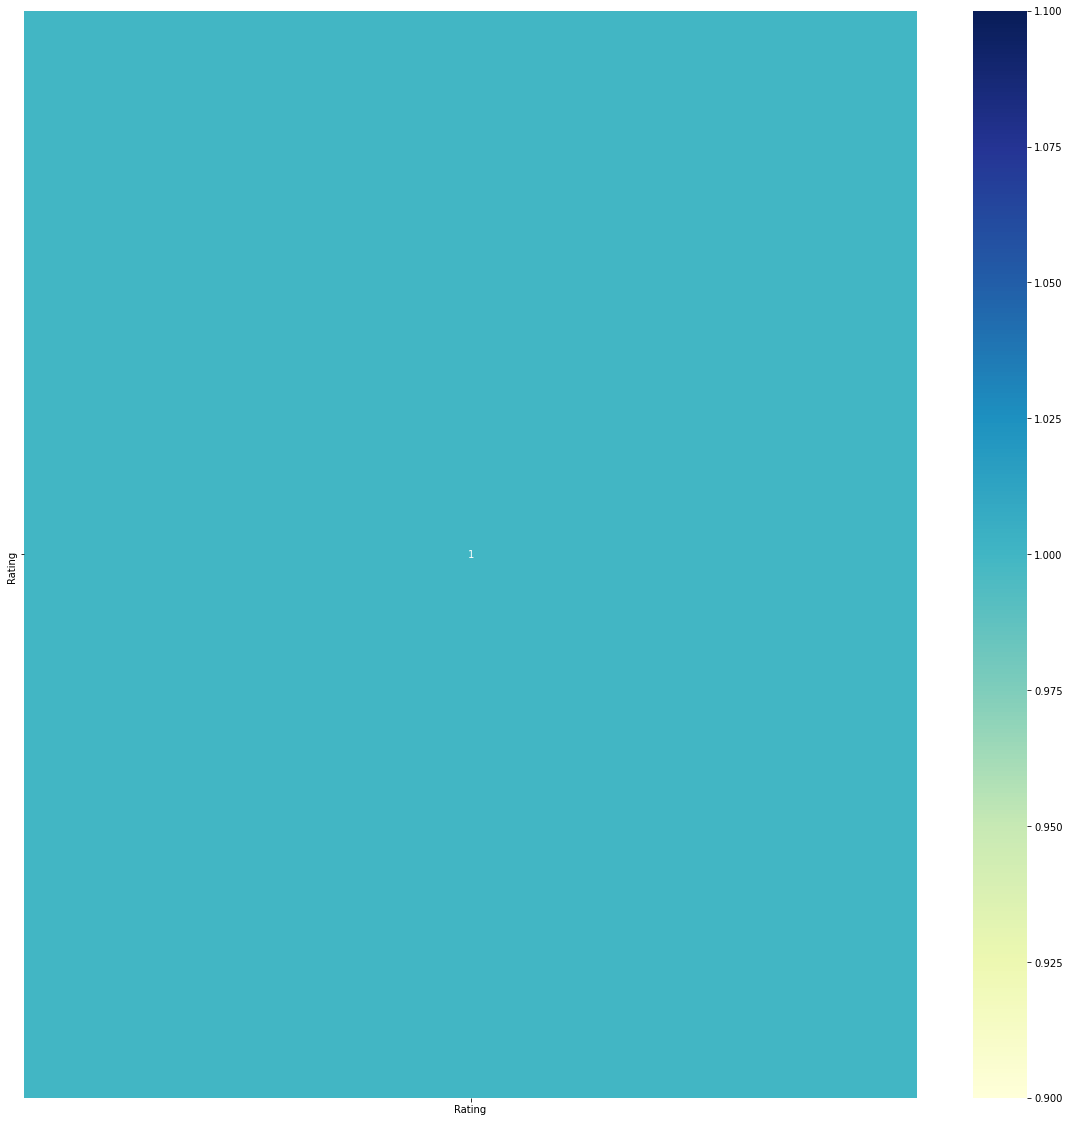

In [111]:
# correlation
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

In [185]:
categorical_cols = df.select_dtypes(include = ['object'])
categorical_cols.head()

,Operator,In Out Travelling,Network Type,Call Drop Category
3,RJio,Indoor,4G,Satisfactory
4,BSNL,Indoor,3G,Call Dropped
5,Vodafone,Indoor,4G,Poor Voice Quality
9,Vodafone,Indoor,4G,Satisfactory
11,RJio,Indoor,4G,Call Dropped


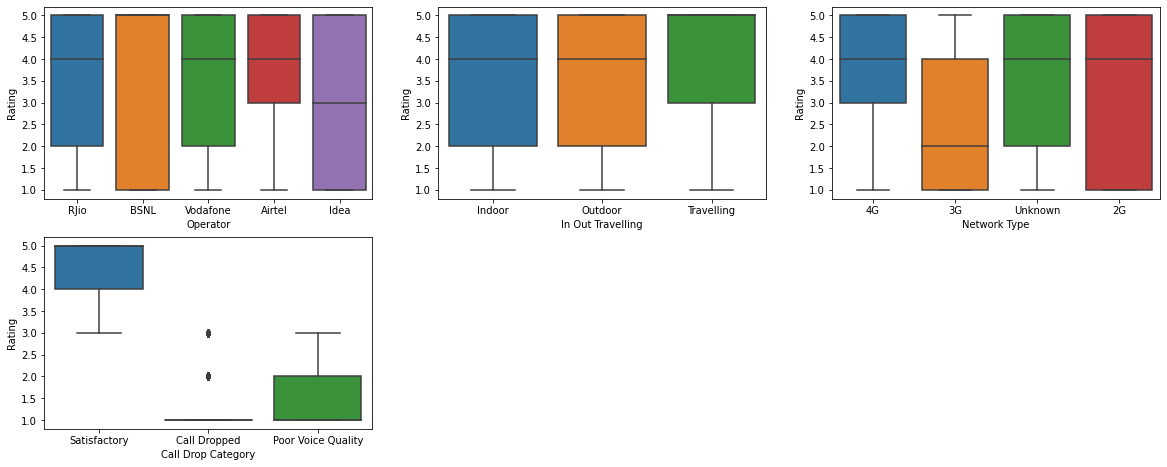

In [186]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Operator', y = 'Rating', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'In Out Travelling', y = 'Rating', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'Network Type', y = 'Rating', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'Call Drop Category', y = 'Rating', data = df)

1. From the price boxplot it is clear that Network Type with 4G in the dataset has the highest rating.
2. Call Dropped has the lowest Rating compared to other Call Drop Categories.
3. The median rating of Indoor is the same as that of Outdoor.
4. Indoor and Outdoor are almost equally rated. There are however some outliers.
 



1. Mizoram state has the highest median rating in the dataset. 

**Data preparation:**


In [187]:
#creating dummies
df_dummies = pd.get_dummies(categorical_cols, drop_first = True)
df_dummies.head()

,Operator_BSNL,Operator_Idea,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
3,0,0,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0
5,0,0,0,1,0,0,0,1,0,1,0
9,0,0,0,1,0,0,0,1,0,0,1
11,0,0,1,0,0,0,0,1,0,0,0


In [188]:
rating_df=pd.concat([df,df_dummies],axis=1)

In [189]:
rating_df=rating_df.drop(['Operator','In Out Travelling','Network Type','Call Drop Category'],axis=1)

In [190]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6077 entries, 3 to 9733
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Rating                                 6077 non-null   int64
 1   Operator_BSNL                          6077 non-null   uint8
 2   Operator_Idea                          6077 non-null   uint8
 3   Operator_RJio                          6077 non-null   uint8
 4   Operator_Vodafone                      6077 non-null   uint8
 5   In Out Travelling_Outdoor              6077 non-null   uint8
 6   In Out Travelling_Travelling           6077 non-null   uint8
 7   Network Type_3G                        6077 non-null   uint8
 8   Network Type_4G                        6077 non-null   uint8
 9   Network Type_Unknown                   6077 non-null   uint8
 10  Call Drop Category_Poor Voice Quality  6077 non-null   uint8
 11  Call Drop Category_Satisfactor

In [191]:
rating_df

,Rating,Operator_BSNL,Operator_Idea,Operator_RJio,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
3,5,0,0,1,0,0,0,0,1,0,0,1
4,1,1,0,0,0,0,0,1,0,0,0,0
5,1,0,0,0,1,0,0,0,1,0,1,0
9,5,0,0,0,1,0,0,0,1,0,0,1
11,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9726,5,0,0,1,0,0,0,0,1,0,0,1
9728,4,0,0,0,0,0,0,0,0,0,0,1
9729,4,0,0,0,0,0,0,0,1,0,0,1
9732,4,0,0,1,0,1,0,0,1,0,0,1


**Spliting the data into test and train**

In [192]:
df_train, df_test = train_test_split(rating_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [193]:
df_train.shape


(4253, 12)

In [194]:
df_test.shape


(1824, 12)

**Model Building**

In [195]:
import warnings

In [196]:
y_train = df_train.pop('Rating')
X_train = df_train

**Model building using RFE**

In [197]:
lr = LinearRegression()
lr.fit(X_train,y_train)
rfe=RFE(lr,10)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [198]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Operator_BSNL', True, 1),
 ('Operator_Idea', True, 1),
 ('Operator_RJio', False, 2),
 ('Operator_Vodafone', True, 1),
 ('In Out Travelling_Outdoor', True, 1),
 ('In Out Travelling_Travelling', True, 1),
 ('Network Type_3G', True, 1),
 ('Network Type_4G', True, 1),
 ('Network Type_Unknown', True, 1),
 ('Call Drop Category_Poor Voice Quality', True, 1),
 ('Call Drop Category_Satisfactory', True, 1)]

In [199]:
cols = X_train.columns[rfe.support_]
cols

Index(['Operator_BSNL', 'Operator_Idea', 'Operator_Vodafone',
       'In Out Travelling_Outdoor', 'In Out Travelling_Travelling',
       'Network Type_3G', 'Network Type_4G', 'Network Type_Unknown',
       'Call Drop Category_Poor Voice Quality',
       'Call Drop Category_Satisfactory'],
      dtype='object')

**Model 1:**

In [200]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [201]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     2269.
Date:                Sun, 28 Mar 2021   Prob (F-statistic):               0.00
Time:                        16:14:45   Log-Likelihood:                -4042.5
No. Observations:                4253   AIC:                             8107.
Df Residuals:                    4242   BIC:                             8177.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [130]:

#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,Operator_BSNL,1.20
7,Network Type_Unknown,1.07
8,Call Drop Category_Poor Voice Quality,0.63
4,In Out Travelling_Travelling,0.37
9,Call Drop Category_Satisfactory,0.30
5,Network Type_3G,0.29
1,Operator_Idea,0.24
3,In Out Travelling_Outdoor,0.05
6,Network Type_4G,0.04
2,Operator_Vodafone,0.01


**Residual analysis:**

In [131]:
y_train_pred = lr_1.predict(X1_sm)
y_train_pred.head()

3675    1.181534
7057    4.516745
8109    4.458010
5043    4.563566
2696    4.382641
dtype: float64

In [132]:
Residual = y_train- y_train_pred


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


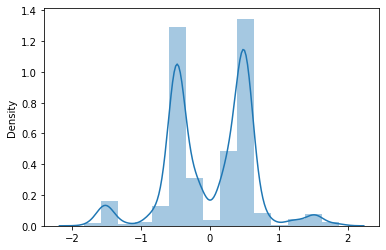

In [133]:
sns.distplot(Residual, bins =15)


**Making Predictions:**

In [202]:
y_test = df_test.pop('Rating')
X_test = df_test

In [203]:
final_cols = X1.columns

In [204]:
X_test_model= X_test[final_cols]
X_test_model.head()

,Operator_BSNL,Operator_Idea,Operator_Vodafone,In Out Travelling_Outdoor,In Out Travelling_Travelling,Network Type_3G,Network Type_4G,Network Type_Unknown,Call Drop Category_Poor Voice Quality,Call Drop Category_Satisfactory
4443,0,1,0,1,0,0,1,0,0,1
992,0,0,0,1,0,0,1,0,0,1
7300,0,0,0,0,0,0,1,0,0,0
455,0,0,1,0,1,1,0,0,0,0
3166,0,0,0,0,0,0,0,1,1,0


In [205]:
X_test_sm = sm.add_constant(X_test_model)

In [206]:
y_pred = lr_1.predict(X_test_sm)

In [207]:
y_pred.head()

4443    4.504832
992     4.458010
7300    1.181534
455     1.358819
3166    1.362806
dtype: float64

Text(0, 0.5, 'y_pred')

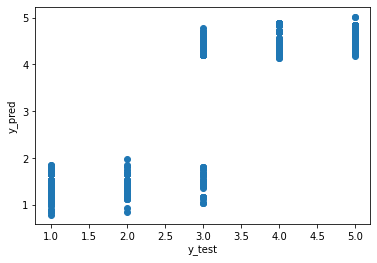

In [208]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [209]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8450159766336738

In [212]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [233]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
#tn, fp, fn, tp = 
#x=cf.ravel()
#print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)
#print(x)

Confusion Matrix
[[262   3   0  12  98]
 [ 97   2   0   1  11]
 [ 40   0   0   7  94]
 [  0   0   0 113 282]
 [  0   0   0  71 731]]


In [237]:
cnf_matrix=cf

FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide


In [218]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))
# Precision is defined as the number of true positives divided by the number of true positives plus the number of false positives. the first cell (0.66 is calculated from 262/(262+97+40+0+0))

              precision    recall  f1-score   support

           1       0.66      0.70      0.68       375
           2       0.40      0.02      0.03       111
           3       0.00      0.00      0.00       141
           4       0.55      0.29      0.38       395
           5       0.60      0.91      0.72       802

    accuracy                           0.61      1824
   macro avg       0.44      0.38      0.36      1824
weighted avg       0.54      0.61      0.54      1824



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
